In [105]:
import os
import pickle as pkl
import sys

import bokeh
import numpy as np
import pandas as pd
from bokeh.layouts import column, gridplot
from bokeh.models import BoxZoomTool, HoverTool, ResetTool, TapTool
from bokeh.models import ColumnDataSource
from bokeh.models.callbacks import CustomJS
from bokeh.plotting import Figure as bokehfigure
from bokeh.plotting import figure as bokehfigure
from bokeh.plotting import save as bokehsave
from scipy.interpolate import InterpolatedUnivariateSpline
# print ("bokeh version", bokeh.__version__)
#, HBox, VBoxForm, BoxSelectTool, TapTool
#from bokeh.models.widgets import Select
#Slider, Select, TextInput
from bokeh.plotting import output_file
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()

cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
cmd_folder = os.getenv("SESNCFAlib") + "/templates"
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from savgol import savitzky_golay
from snclasses import *
from templutils import *
from makePhottable import *
from colors import rgb_to_hex
from ubertemplates import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline

In [103]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
    


In [168]:
all_params = pkl.load(open("outputs/all_params_scipy_opt.pkl", "rb"))

In [169]:
all_params

{'ASASSN-14ms': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],
  'r': [],
  'i': [],
  'J': [],
  'H': [],
  'K': [],
  'w1': [],
  'w2': [],
  'm2': []},
 'DES16s1kt': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],
  'r': [],
  'i': [],
  'J': [],
  'H': [],
  'K': [],
  'w1': [],
  'w2': [],
  'm2': []},
 'iPTF13bvn': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],
  'r': [],
  'i': [],
  'J': [],
  'H': [],
  'K': [],
  'w1': [],
  'w2': [],
  'm2': []},
 'iPTF15dld': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],
  'r': [],
  'i': [],
  'J': [],
  'H': [],
  'K': [],
  'w1': [],
  'w2': [],
  'm2': []},
 'iPTF15dtg': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],
  'r': [],
  'i': [],
  'J': [],
  'H': [],
  'K': [],
  'w1': [],
  'w2': [],
  'm2': []},
 'LSQ13ccw': {'U': [],
  'u': [],
  'B': [],
  'V': [],
  'R': [],
  'I': [],
  'g': [],

In [162]:
readgood = pd.read_csv("good_GP_OPT2.csv", header=None)

In [163]:
par1 = []
par2 = []

for i, sn in enumerate(readgood[0]):
    if readgood[2][i] == 'y':
        
        if readgood[1][i].endswith('p'):
            band = readgood[1][i][0]
        else:
            band = readgood[1][i]
        
        
        if len(all_params[sn][band]) != 0:
#             print(all_params[sn][readgood[1][i]])
            par1.append(all_params[sn][band][0][0])
            par2.append(all_params[sn][band][0][1])
        else:
            print(sn, band)
        
        
        

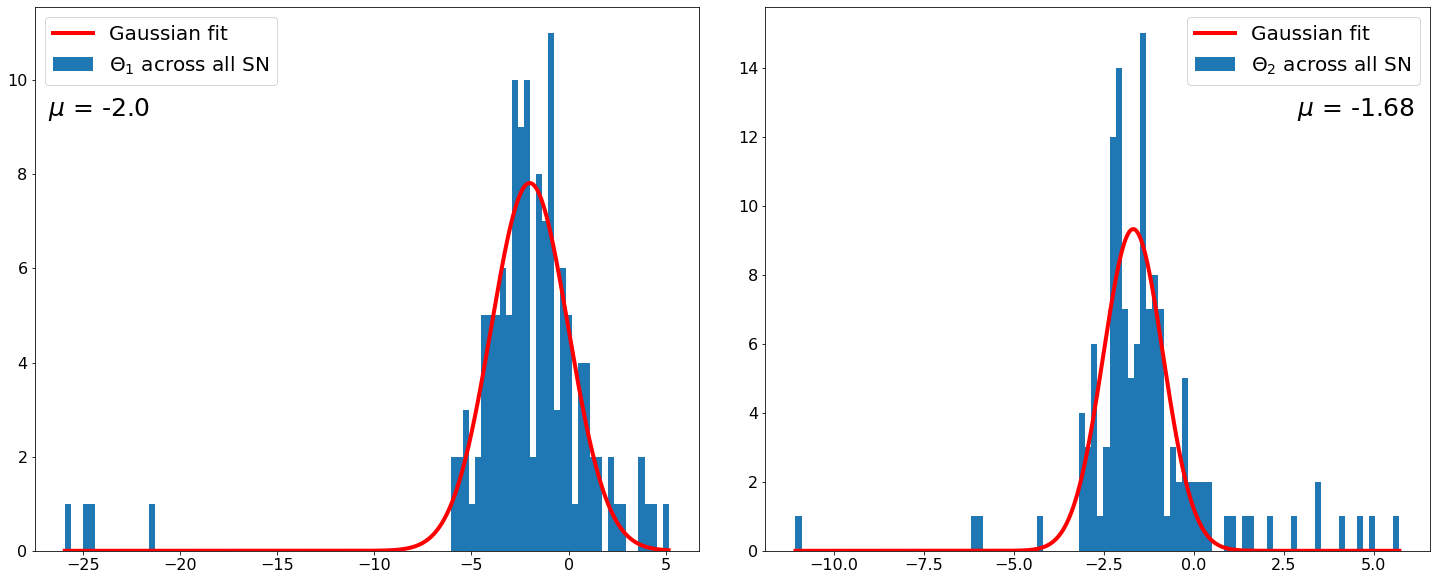

In [167]:
f, axs = pl.subplots(1,2, figsize=(25,10))
f.subplots_adjust(wspace=0.1)

x = par1
bin_heights, bin_borders, _ = axs[0].hist(x, bins=100, label='${\Theta}_1$ across all SN')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs[0].plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt),linewidth=4,color='red', label='Gaussian fit')
axs[0].legend(prop={'size':20})
axs[0].text(0.02,0.8,'$\mu$ = '+ str(round(popt[0],2)),size=25, transform=axs[0].transAxes)


x = par2
bin_heights, bin_borders, _ = axs[1].hist(x, bins=100, label='${\Theta}_2$ across all SN')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs[1].plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt),linewidth=4,color='red', label='Gaussian fit')
axs[1].legend(prop={'size':20})

axs[1].text(0.8,0.8,'$\mu$ = '+ str(round(popt[0],2)),size=25, transform=axs[1].transAxes)



for tick in axs[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in axs[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    

f.savefig("outputs/find_final_params.pdf", bbox_inches = 'tight')

In [166]:
np.median(par2)

-1.4886381603459327

In [96]:
y

array([4.38104553e-05, 5.85526761e-05, 7.77717568e-05, 1.02660470e-04,
       1.34676172e-04, 1.75583805e-04, 2.27501534e-04, 2.92947892e-04,
       3.74888920e-04, 4.76783272e-04, 6.02622846e-04, 7.56965964e-04,
       9.44959707e-04, 1.17234762e-03, 1.44545874e-03, 1.77117377e-03,
       2.15686430e-03, 2.61030135e-03, 3.13953012e-03, 3.75270854e-03,
       4.45790898e-03, 5.26288324e-03, 6.17479368e-03, 7.19991459e-03,
       8.34331069e-03, 9.60850158e-03, 1.09971233e-02, 1.25085998e-02,
       1.41398395e-02, 1.58849716e-02, 1.77351383e-02, 1.96783598e-02,
       2.16994832e-02, 2.37802306e-02, 2.58993528e-02, 2.80328942e-02,
       3.01545703e-02, 3.22362508e-02, 3.42485419e-02, 3.61614491e-02,
       3.79451035e-02, 3.95705271e-02, 4.10104097e-02, 4.22398685e-02,
       4.32371625e-02, 4.39843309e-02, 4.44677313e-02, 4.46784537e-02,
       4.46125936e-02, 4.42713727e-02, 4.36611010e-02])

In [89]:
mu

-2.7593953770225115